In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
gridsearch = 'VAE/lr-bs'
os.chdir(gridsearch)

In [3]:
result = []

for name in os.listdir():
    if name.split('_')[0] == 'train':
        os.chdir(name)
        with open('result.json', 'r') as f:
            last_line = f.readlines()[-1]
            result.append(json.loads(last_line))
        os.chdir('..')
        
results = sorted(result, key=lambda k: k['experiment_tag'])

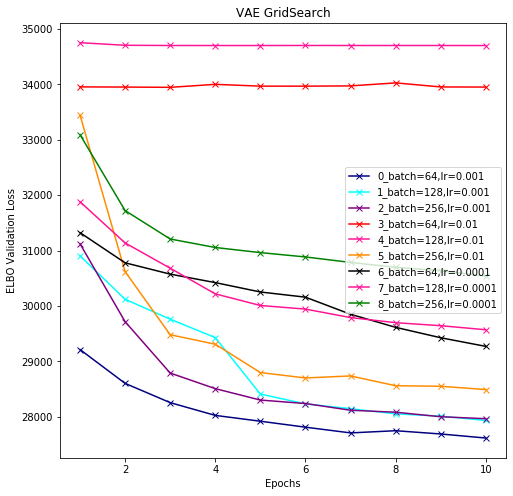

In [5]:
color = ['navy', 'cyan', 'purple', 'red', 'deeppink', 'darkorange', 'black', 'deeppink', 'green']
plt.figure(figsize = (8,8))
for i in range(len(results)):
    plt.plot(np.arange(1,11),results[i]['mean_acc'], marker = 'x', color = color[i], label = results[i]['experiment_tag']);
plt.legend(loc = 'best');
plt.ylabel('ELBO Validation Loss');
plt.xlabel('Epochs');
plt.title('VAE GridSearch');

In [9]:
newlist

[{'mean_acc': [29895.9930859375,
   29571.316640625,
   28769.7743359375,
   28612.49296875,
   28505.3919140625,
   28387.1412890625,
   28333.574921875,
   28278.7986328125,
   28256.0435546875,
   28224.8376953125],
  'trial_id': '00000',
  'training_iteration': 9,
  'time_this_iter_s': 358.63750314712524,
  'done': False,
  'timesteps_total': None,
  'episodes_total': None,
  'experiment_id': '8557fbd33d884a6499fe708b3ba9e9a9',
  'date': '2020-05-11_13-45-14',
  'timestamp': 1589197514,
  'time_total_s': 3595.1387238502502,
  'pid': 29580,
  'hostname': 'n-62-20-10',
  'node_ip': '10.66.20.10',
  'config': {'z': 20},
  'time_since_restore': 3595.1387238502502,
  'timesteps_since_restore': 0,
  'iterations_since_restore': 10,
  'experiment_tag': '0_z=20'},
 {'mean_acc': [28961.6491796875,
   27916.849140625,
   27605.9908984375,
   27555.8738671875,
   27429.8121875,
   27410.5946484375,
   27258.6079296875,
   27217.30453125,
   27177.9968359375,
   27147.6703515625],
  'trial_id':

In [7]:
os.getcwd()
os.chdir('../..')
os.getcwd()

'/home/piet/Desktop/DTU/Bachelor/ray_results'

In [25]:
val = []
train = []
for file in os.listdir():
    if file.split('_')[-1] == 'val.txt':
        val.append(np.loadtxt(file, delimiter = ',').astype(float))
        
    if file.split('_')[-1] == 'train.txt':
        train.append(np.loadtxt(file, delimiter = ',').astype(float))
        
val = (val[0]+val[1])/2
train = (train[0]+train[1])/2

print('Mean acc train: {}'.format(train), '\nMean acc val: {}'.format(val))

Mean acc train: [0.79966801 0.85795737 0.874012   0.88708982 0.89210444 0.89403422
 0.90489116 0.90668326 0.90502687 0.91220663] 
Mean acc val: [0.84054078 0.84835923 0.84158031 0.84382658 0.8365349  0.84768315
 0.84482607 0.83035986 0.85151065 0.84616705]


In [2]:
model = 'DenseNet'
os.chdir(model)

In [6]:
os.getcwd()
os.chdir('..')

In [7]:
trials_train = []
trials_val = []
trials_label = []


for file in os.listdir():
    if 'train' in file:
        os.chdir(file)
        df = pd.read_csv('progress.csv')

        trials_train.append(df['mean_acc'].iloc[::2])
        trials_val.append(df['mean_acc'].iloc[1::2])
        trials_label.append(df['experiment_tag'][0])

        os.chdir('..')



In [10]:
os.chdir('lr=0.1,bs=256')


In [12]:
val = []
train = []
for file in os.listdir():
    if file.split('_')[-1] == 'val.txt':
        val.append(np.loadtxt(file, delimiter = ',').astype(float))
        
    if file.split('_')[-1] == 'train.txt':
        train.append(np.loadtxt(file, delimiter = ',').astype(float))
        
val = (val[0]+val[1])/2
train = (train[0]+train[1])/2

In [19]:
trials_label.append('8_batch=256,lr=0.1')

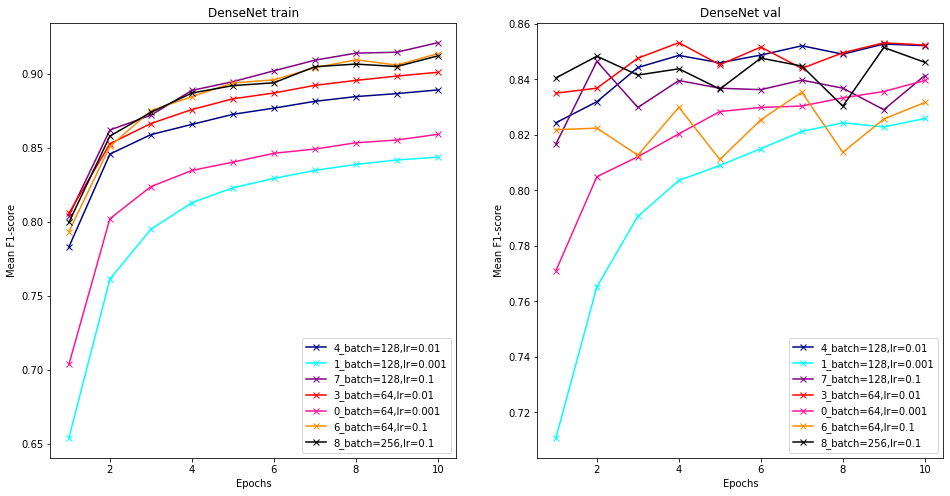

In [25]:
color = ['navy', 'cyan', 'purple', 'red', 'deeppink', 'darkorange', 'black', 'deeppink', 'green']
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
for i in range(len(trials_train)):
    plt.plot(np.arange(1,11),trials_train[i], marker = 'x', color = color[i], label = trials_label[i]);
plt.legend(loc = 'best');
plt.ylabel('Mean F1-score');
plt.xlabel('Epochs');
plt.title('DenseNet train');

plt.subplot(1,2,2)
for i in range(len(trials_val)):
    plt.plot(np.arange(1,11),trials_val[i], marker = 'x', color = color[i], label = trials_label[i]);
plt.legend(loc = 'best');
plt.ylabel('Mean F1-score');
plt.xlabel('Epochs');
plt.title('DenseNet val');
plt.show()

In [24]:
trials_val[0]

1     0.824377
3     0.831976
5     0.844304
7     0.848657
9     0.846000
11    0.848775
13    0.852125
15    0.849112
17    0.852763
19    0.852180
Name: mean_acc, dtype: float64

In [56]:
model = 'SVAE/2'
os.chdir(model)


In [57]:
trials_val = []
trials_label = []

for file in os.listdir():

    os.chdir(file)
    df = pd.read_csv('progress.csv')
    trials_val.append(df['mean_acc'])
    trials_label.append(df['experiment_tag'][0])
    
    os.chdir('..')



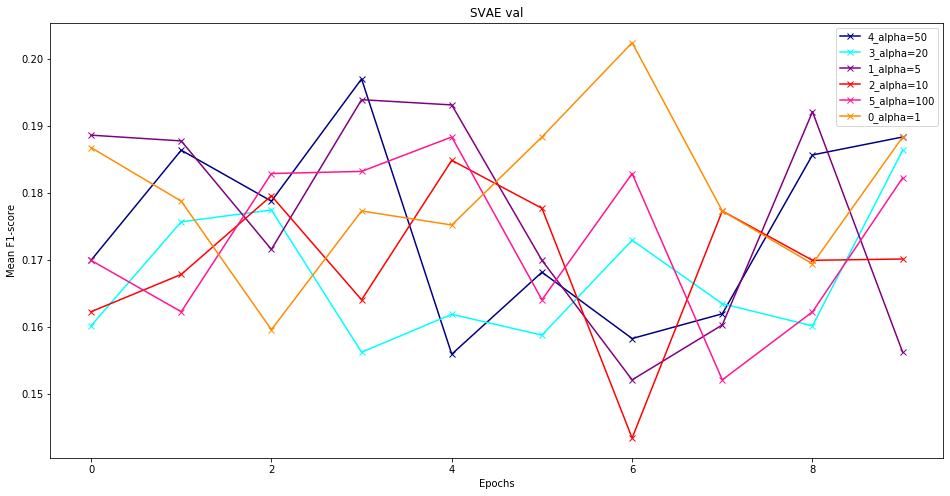

In [58]:
color = ['navy', 'cyan', 'purple', 'red', 'deeppink', 'darkorange', 'red', 'deeppink', 'black']

plt.figure(figsize = (16,8))
for i in range(len(trials_val)):
    plt.plot(trials_val[i], marker = 'x', color = color[i], label = trials_label[i]);
plt.legend(loc = 'best');
plt.ylabel('Mean F1-score');
plt.xlabel('Epochs');
plt.title('SVAE val');
plt.show()

In [55]:
os.chdir('..')
os.getcwd()

'/home/piet/Desktop/DTU/Bachelor/ray_results'